# Principal Component Analysis from Scratch
***
## Table of Contents
1. [Loading Data](#1.-loading-data)
2. [Standardisation](#2-standardisation)
3. [Covariance Matrix](#3-covariance-matrix)
4. [Eigenvalues and Eigenvectors](#4-eigenvalues-and-eigenvectors)
5. [Data Transformation](#5-data-transformation)
6. [Explained Variance and Cumulative Explaiend Variance](#6-explained-variance-and-cumulative-explained-variance)
    - [Explained Variance](#explained-variance)
    - [Cumulative Explained Variance](#cumulative-explained-variance)
7. [Visualisation](#7-visualisation)
8. [Model Encapsulation](#8-model-encapsulation)
9. [Comparison with Scikit-Learn](#9-comparison-with-scikit-learn)
***

Principal Component Analysis (PCA) is a statistical technique widely used for dimentionality reduction, which aims to simplify complex datasets by reducing the number of variables while preserving as much information (also referred to as variability or variance) as possible. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from numpy.typing import NDArray

## 1. Loading Data

In [2]:
wine_data = load_wine(as_frame=True)
X = wine_data.data
feature_names = wine_data.feature_names

In [3]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [5]:
n_samples, n_features = X.shape
print('Number of samples:', n_samples)
print('Number of features:', n_features)

Number of samples: 178
Number of features: 13


## 2. Standardisation

PCA is sensive to the scale of variables. We need to standardise the data for each feature if the dataset contains variables with different scales.

\begin{align*}
Z = \dfrac{X - \bar X}{\sigma}
\end{align*}

where: 
- $X$: Original dataset.
- $\bar X$: Mean of each feature in $X$.
- $\sigma$: Standard deviation of each feature in $X$.

In [6]:
def standardise_data(X: NDArray[np.float64]) -> NDArray[np.float64]:
    return (X - np.mean(X, axis=0))/np.std(X, axis=0)

In [7]:
X_standardised = standardise_data(X)
X_standardised

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


## 3. Covariance Matrix

The covariance matrix quantifies how variables in a dataset are related to one another. A positive covariance indicates a direct relationship between variables, meaning that as one variable increases, the other variable also tends to increase, suggesting a linear correlation. On the other hand, a negative covariance indicates an inverse relationship, meaning that as one variable increases, the other variable tends to decrease, reflecting a negative linear correlation. A covariance value of zero implies that the two variables are independent of each other having no linear relationship.



\begin{align*}

Cov(X) = \dfrac{X_{s}^{T}X_{s}}{n - 1}

\end{align*}

where:
- $X_{s}$: Standardised dataset of $X$.
- $X_{s}^{T}$: Transposed $X_{s}$.
- $n$: Number of samples in $X$.

In [8]:
def calculate_covariance(X_std: NDArray[np.float64]) -> NDArray[np.float64]:
    return np.cov(X_std, rowvar=False)

In [9]:
cov_matrix = calculate_covariance(X_standardised)

## 4. Eigenvalues and Eigenvectors
The eigenvalues ($\lambda$) and the eigenvectors ($v$) of the covariance matrix ($C$):

\begin{align*}
Cv = \lambda v
\end{align*}

The eigenvectors defines the directions of the maximum variance, which are known as the principal components. The corresponding eigenvalues indicates the amount of variance captured by each principal component - the larger the eigenvalue, the more variance is explained along the direction. To determine the most significant principal components, we sort the eigenvalues in descending order, then select the first $k$ eivenvectors.

In [10]:
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

sorted_idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_idx]
eigenvectors = eigenvectors[:, sorted_idx]

k = 2  # for example, to reduce to 2 dimensions
W = eigenvectors[:, :k]

## 5. Data Transformation
Project the original standardised data onto the new feature space:
\begin{align*}
X_{reduced} = X_{standardised} \cdot W
\end{align*}

In [11]:
X_reduced = np.dot(X_standardised, W)
X_reduced[:5]

array([[-3.31675081,  1.44346263],
       [-2.20946492, -0.33339289],
       [-2.51674015,  1.0311513 ],
       [-3.75706561,  2.75637191],
       [-1.00890849,  0.86983082]])

## 6. Explained Variance and Cumulative Explained Variance
**Explained Variance** and **Cumulative Explained Variance** are fundamental concepts in Principal Component Analysis that provide insight into how effectively the principal components represent the variability in the original dataset. 

### Explained Variance
Explained Variance refers to the proportion of the total variance in the original data that is captured by each individual principal component. For each eigenvector (principal component) of the covariance matrix, the explained variance is proportional to its associated eigenvalue. The higher the eigenvalue, the more variance that component explains.

\begin{align*}
\text{Explained Variance Ratio} = \dfrac{\text{Eigenvalue of Pricinpal Component}}{\text{Sum of All Eigenvalues}}
\end{align*}


### Cumulative Explained Variance
Cumulative explained variance is the running total of the explained variance as more principal components are included. It provides a measure of the total variance captured by the first $k$ principal components combined. This metric is particularly useful for deciding how many components are necessary to reach a desired threshold of explained variance (such as 90% or 95%), ensuring that most of the important information in the data is preserved while reducing dimensionality.

\begin{align*}
\text{Cumulative Explained Variance} = \text{Cumsum(Explained Variance Ratios)}
\end{align*}

In [12]:
# Calculate explained variance and cumulative explained variance
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

## 7. Visualisation
We need a function to plot the explained variance and the cumulative explained variance.

In [13]:
def plot_explained_variance(ev_ratio, cev):
    # Plot the graphs
    plt.figure(figsize=(12, 6))

    # Percentage of explained variance
    plt.subplot(1, 2, 1)
    plt.bar(range(1, len(ev_ratio) + 1),
            ev_ratio, alpha=0.7, color='b', label='Explained Variance')
    plt.xlabel('Principal Component')
    plt.ylabel('Variance Ratio')
    plt.title('Explained Variance by Principal Component')
    plt.grid(True)

    # Cumulative explained variance
    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(cev) + 1),
             cev, marker='o', color='r', label='Cumulative Variance')
    plt.xlabel('Principal Component')
    plt.ylabel('Cumulative Variance Ratio')
    plt.title('Cumulative Explained Variance')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

## 8. Model Encapsulation

In [ ]:
class CustomPCA:
    """
    Custom implementation of Principal Component Analysis (PCA) for dimensionality reduction.

    Attributes:
        n_components: Number of principal components to retain.
        components: Principal axes in feature space.
        mean: Per-feature mean, estimated from the training set.
        eigenvalues: Eigenvalues corresponding to the selected components.
        all_eigenvalues: All eigenvalues from the covariance matrix.
    """

    def __init__(self, n_components: int):
        """
        Initialise the CustomPCA object.

        Args:
            n_components: Number of principal components to retain.
        """
        self.n_components = n_components
        self.components = None
        self.mean = None
        self.eigenvalues = None
        self.all_eigenvalues = None

    def fit(self, X_standardised: NDArray[np.float64]) -> None:
        """
        Fit the PCA model to the data.

        Computes the covariance matrix, performs eigen decomposition,
        and selects the top n_components principal components.

        Args:
            X_standardised: Standardised input features of shape (n_samples, n_features).
        """
        # Calculate the covariance matrix
        cov_matrix = np.cov(X_standardised, rowvar=False)
        # Perform eigen decomposition
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
        # For explained variance
        self.all_eigenvalues = eigenvalues

        # Sort eigenvalues and eigenvectors in descending order
        sorted_idx = np.argsort(eigenvalues)[::-1]
        self.eigenvalues = eigenvalues[sorted_idx][:self.n_components]
        self.components = eigenvectors[:, sorted_idx][:, :self.n_components]

    def transform(self, X_standardised: NDArray[np.float64]) -> NDArray[np.float64]:
        """
        Project the data onto the principal components.

        Args:
            X_standardised: Standardised input features of shape (n_samples, n_features).

        Returns:
            Transformed data of shape (n_samples, n_components).
        """
        if self.components is None:
            raise ValueError('Fit the PCA model before transforming data.')
        return np.dot(X_standardised, self.components)

    @property
    def explained_variance_ratio(self) -> NDArray[np.float64]:
        """
        The proportion of variance explained by each principal component.

        Returns:
            Explained variance ratio for each component.
        """
        if self.eigenvalues is None:
            raise ValueError(
                'Fit the model before accessing explained_variance_ratio.')
        return self.eigenvalues / np.sum(self.all_eigenvalues)

    @property
    def cumulative_explained_variance(self) -> NDArray[np.float64]:
        """
        The cumulative sum of explained variance ratios.

        Returns:
            Cumulative explained variance ratio.
        """
        if self.eigenvalues is None:
            raise ValueError(
                'Fit the model before accessing cumulative_explained_variance.')
        return np.cumsum(self.explained_variance_ratio)

Using the loaded dataset at the beginning, let's execute PCA and visualise the results.

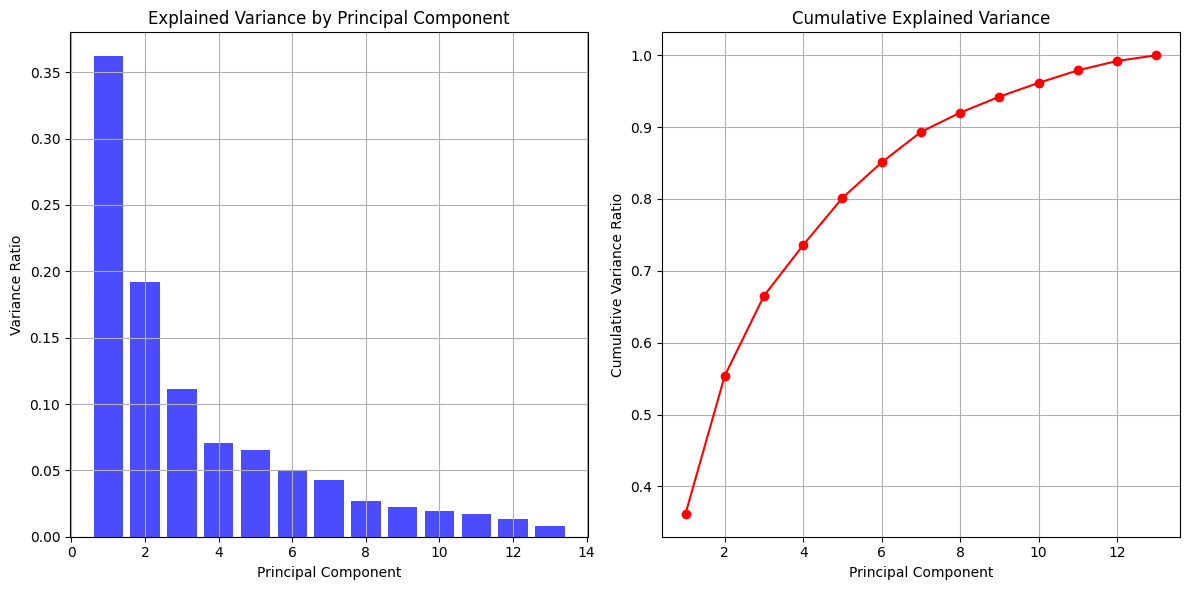

In [15]:
X_standardised = standardise_data(X)
custom_pca = CustomPCA(n_components=X.shape[1])
custom_pca.fit(X_standardised)

explained_variance_ratio = custom_pca.explained_variance_ratio
cumulative_explained_variance = custom_pca.cumulative_explained_variance

plot_explained_variance(explained_variance_ratio,
                        cumulative_explained_variance)

The desired level of information retention when using PCA depends on the specific context and requirements of the problem to be solved. According to the graphs above, if we aim to achieve 90% variance retention, the top 8 components would be sufficient instead of all 13. Similarly, for 80% variance retention, only 5 components would be enough.

## 9. Comparison with Scikit-Learn

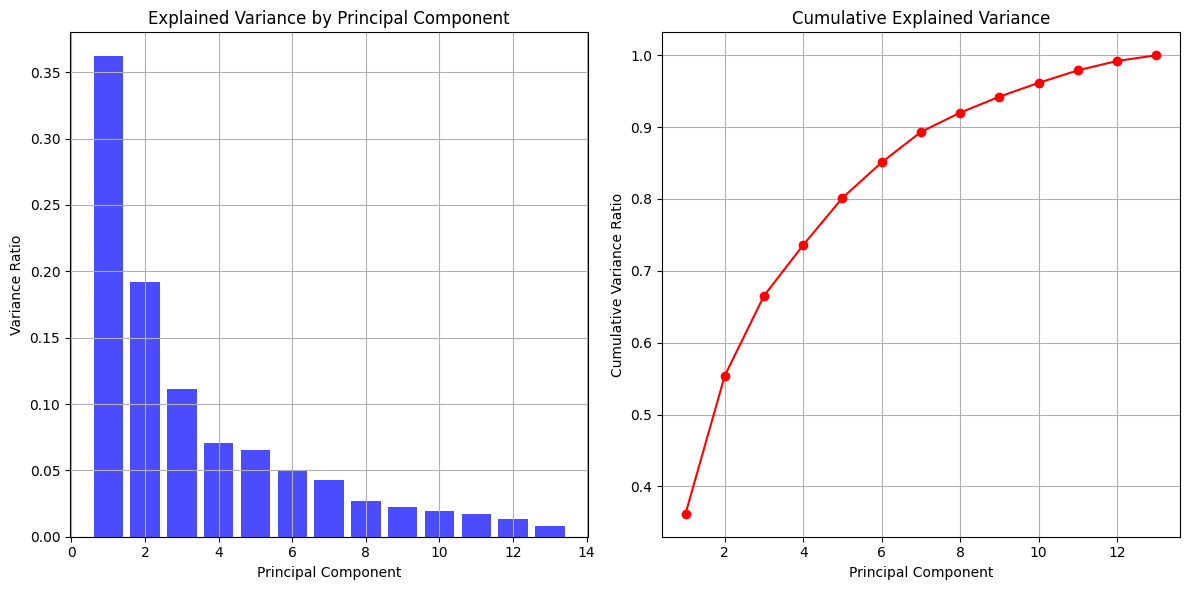

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=X.shape[1])
pca.fit(X_scaled)

explained_variance_ratio_sk = pca.explained_variance_ratio_
cumulative_explained_variance_sk = np.cumsum(explained_variance_ratio)

plot_explained_variance(explained_variance_ratio_sk,
                        cumulative_explained_variance_sk)

In [17]:
custom_pca = CustomPCA(n_components=8)
custom_pca.fit(X_standardised)
X_transformed_custom = custom_pca.transform(X_standardised)

X_transformed_custom

array([[-3.31675081,  1.44346263,  0.16573904, ..., -0.22388013,
        -0.59642655,  0.06513909],
       [-2.20946492, -0.33339289,  2.02645737, ..., -0.92712024,
        -0.05377561,  1.02441595],
       [-2.51674015,  1.0311513 , -0.98281867, ...,  0.54927605,
        -0.42420545, -0.34421613],
       ...,
       [ 2.67783946,  2.76089913,  0.94094188, ...,  0.27306792,
        -0.67923541,  0.0470238 ],
       [ 2.38701709,  2.29734668,  0.5506962 , ...,  1.17878298,
        -0.63397527,  0.39082877],
       [ 3.20875816,  2.76891957, -1.01391366, ...,  0.29609218,
        -0.00574126, -0.29291373]], shape=(178, 8))

In [18]:
sk_pca = PCA(n_components=8)
sk_pca.fit(X_standardised)
X_transformed_sk = sk_pca.transform(X_standardised)

X_transformed_sk

array([[ 3.31675081,  1.44346263, -0.16573904, ...,  0.22388013,
         0.59642655, -0.06513909],
       [ 2.20946492, -0.33339289, -2.02645737, ...,  0.92712024,
         0.05377561, -1.02441595],
       [ 2.51674015,  1.0311513 ,  0.98281867, ..., -0.54927605,
         0.42420545,  0.34421613],
       ...,
       [-2.67783946,  2.76089913, -0.94094188, ..., -0.27306792,
         0.67923541, -0.0470238 ],
       [-2.38701709,  2.29734668, -0.5506962 , ..., -1.17878298,
         0.63397527, -0.39082877],
       [-3.20875816,  2.76891957,  1.01391366, ..., -0.29609218,
         0.00574126,  0.29291373]], shape=(178, 8))

Our custom PCA implementation produced the results identical to those of scikit-learn's PCA, except for the sign of the components. This difference comes from the nature of eigenvectors: *if $v$ is an eigenvector, then $−v$ is also a valid eigenvector corresponding to the same eigenvalue*. Consequently, the direction of each principal component is arbitrary with respect to sign, which does not affect the quality, interpretation, or usefulness of the PCA results. The principal components still span the same subspace, and the variance explained by each component remains unchanged.